### BPS5112 
<MTMarkdownOptions output='html4'>
    <center>
        <h1 style="font-family:Times New Roman" > Non-linear self-shading optimization of curved facades using Diffrential-Evolution</h1>
    <div style="font-family:Times New Roman; margin:10px" >Mahmoud Mohamed AbdelRahman.</div>
    National University of Singapore - Department of Building 2018
    </center>
</MTMarkdownOptions>



# 1. Irradiance-based simulation

In [271]:
import json
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def readTheFile():
    f = open('D:/BUDSLAB/Spatial-temporal-tool/ThreeJs/allRestuls.json', 'r')
    text = f.read()+"]"
    text = text.replace(",\n]", "]")
    j = json.loads(text)
    allvals = []
    for i in j: 
        allvals.append(i['av_val'])
    return allvals

#Define a linear fitting function 
"""def fitfunc(x ,  a  ,  b ,  c ,  d, e):
    x = np.array(x)
    return (a*x*x*x*x) + b *x*x*x + c*x*x + d*x+e"""

f = open('D:/BUDSLAB/Spatial-temporal-tool/ThreeJs/allRestuls.json', 'r')
text = f.read()+"]"
text = text.replace(",\n]", "]")
j = json.loads(text)
X = []
y = []
for i in j:
    X.append(i['x'])
    y.append(i['av_val'])

X = np.array(X)
y = np.array(y)



## a. Simulation Optimization Results

22719 [ 2.68348545e-08 -9.47152559e-04  1.32873963e+02]
126.421607213


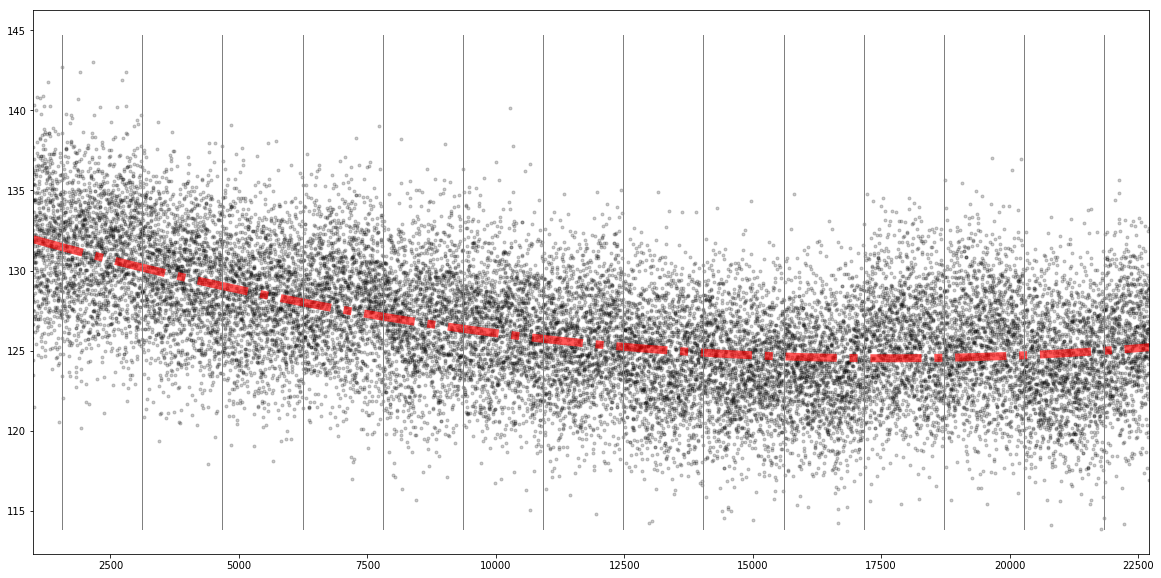

In [283]:
import matplotlib.lines as mlines

#fitting function
def fitfunc(x, a, b, c ):
    x = np.array(x)
    return (a*x*x) + b*x + c


allvals = readTheFile()

#optaining the fitting curve variables (popt) such that a, b : a = the gradient and b is the intersection with x axis 
popt, pcov = curve_fit(fitfunc, range(len(allvals)), allvals)
print(len(allvals), popt )


plt.figure(figsize=(20, 10))
newy = fitfunc(range(len(allvals)), *popt)
plt.plot(range(len(newy)), newy, 'r-.', linewidth=8.0, alpha=0.65)
plt.scatter(range(len(allvals)), allvals , marker='.', color='k', alpha=0.2)
plt.xlim(1000., len(allvals))
# print(np.min(allvals))
print(allvals[-1])
for i in range(80):
    plt.plot([float(i) * 1560., float(i) * 1560.], [np.min(allvals), np.max(allvals)],'gray', linewidth=1.0)
plt.show()

In [23]:
%matplotlib inline

In [53]:
import plotly.plotly as py
import plotly.graph_objs as go

In [63]:
trace1 = go.Scatter(
    x=np.array(range(len(allvals))),
    y=allvals
)
data = [trace1]

py.plot(data, filename = 'basic-line', auto_open=True)

'https://plot.ly/~mahmoud_ouf111/4'

## b. Machine Learning Optimization

103.18205264360114
[-0.12058327486097518, 0.09657187926290176, -1.249809706036612, -1.4534179194890555, -2.0, -1.4912561218936242, -1.4712048828751099, -1.4152078215583124, -1.3570442214260932, -1.2827539234765921, -1.509185898580228, -1.3493235830659411, -1.4510963426810959, -1.832048914262989, -1.7940556751584107, -1.2391287554003487, -1.3559322375104965, -1.3659419851907093, -0.9049285218955258, -0.7989532095959705, -0.4976519310621215, -0.26801514509356617, 0.1471836219710765, -0.5254536821154452, -0.32834260702625767, -0.3153584252082364, -0.1345235035962588, -0.30095411069399536, -0.24140545260493618, -0.3626847227375274, -0.2799746426096985, -0.43246355893993765, -0.9020063341976784, -0.7734218957889769, -0.11572016644527522, 0.2720750534272754, 0.6048777038838006, -0.13965179607671477, -0.8256775845382625, -0.5180606251350934, 0.13865311336706135, -0.23428014431363664, 0.3070318466900842, 0.18015015242438562, -0.008028044056048012, -0.01787983901294285, 0.7256509383957006, 0.17

<Figure size 1440x720 with 0 Axes>

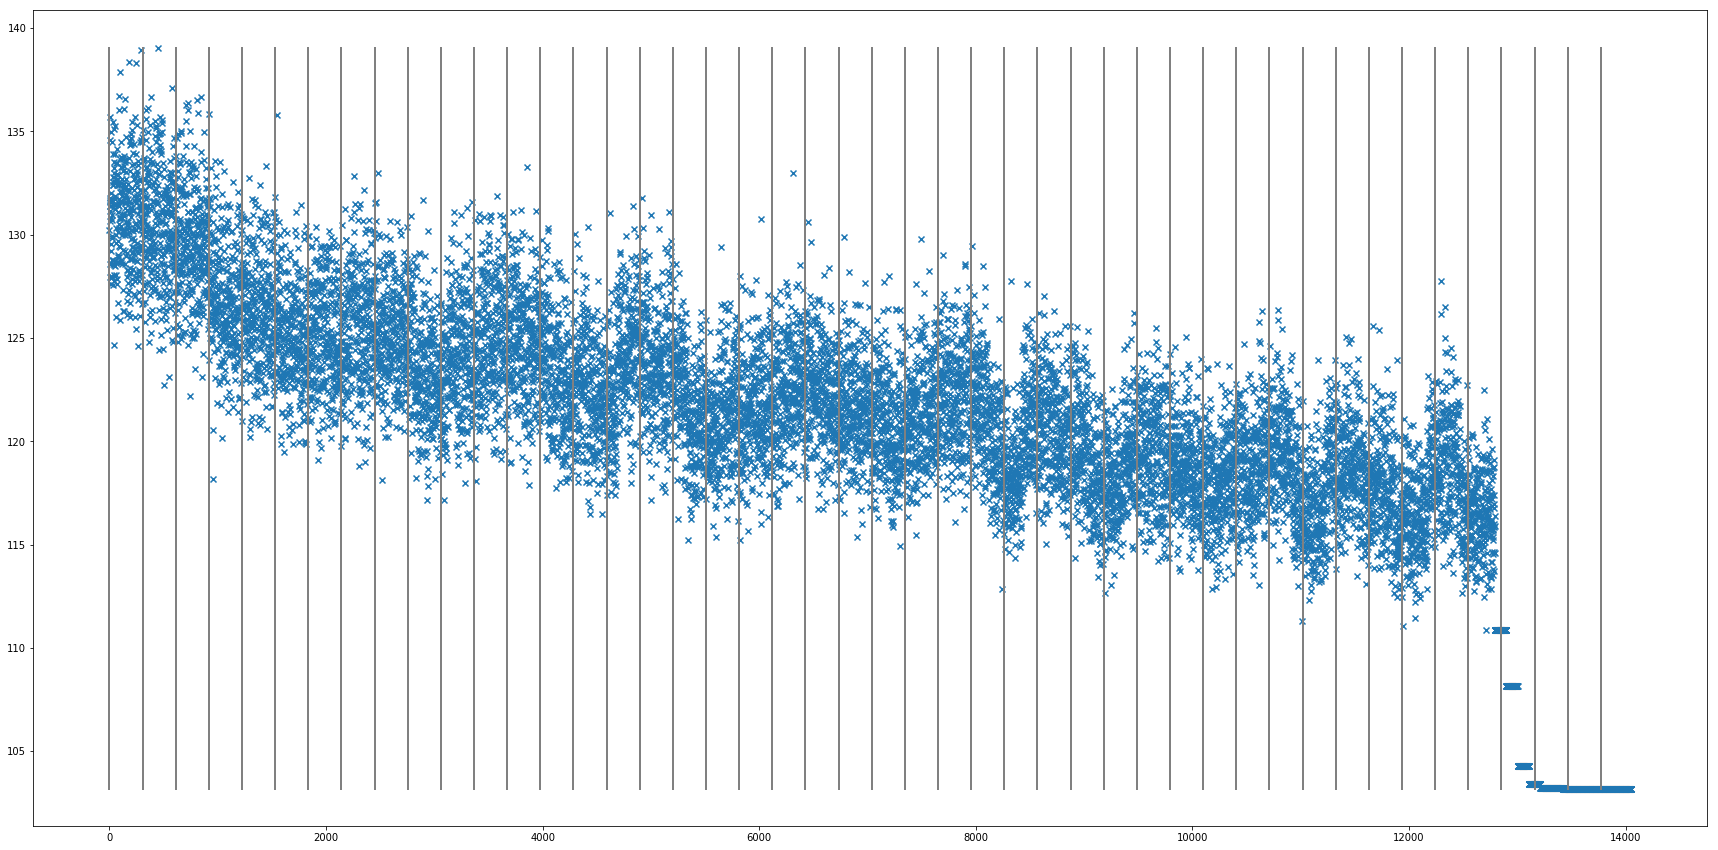

In [272]:
#Support Vector Regression

from sklearn.svm import SVR

model = SVR()
model.fit(X, y)

from scipy.optimize import differential_evolution

iterId = 0
res = []
def ackley(x):
    global model
    r = model.predict([np.array(x),])
    res.append(r[0])
    return r[0]

plt.figure(figsize=(20,10))
bounds = [(-2., 2.)]*104

plt.figure(figsize=(30., 15.))
psize = 3
result = differential_evolution(ackley, bounds, popsize=psize)
print(result['fun'])
print( result['x'].tolist() )
print(len(res))
plt.scatter(range(len(res)), res, marker='x')
for i in range(int(len(res)/(psize* 102.))+1):
    plt.plot([float(i) * psize * 102., float(i) * psize* 102.], [np.min(res), np.max(res)],'gray', linewidth=2.0)

## c. Machine Learning Result

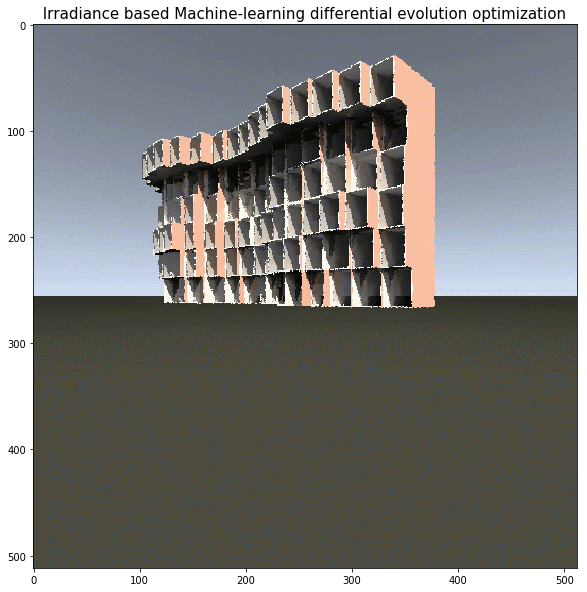

In [293]:

fig,ax = plt.subplots(1, 1)

fig.set_size_inches(10, 10)
im = plt.imread("D:/BUDSLAB/spatial-temporal-tool/ThreeJs/generatedGIF/OptimizedFileName_1545306085_51.gif")
ax.set_title(" Irradiance based Machine-learning differential evolution optimization ", fontsize=15)
ax.imshow(im)